In [1]:
import osmapi

api = osmapi.OsmApi(api="https://api06.dev.openstreetmap.org", username = "alexschalex", password = "amenabar")



https://geoffboeing.com/2016/11/osmnx-python-street-networks/

Paper sobre osmnx
https://www.researchgate.net/publication/309738462_OSMnx_New_Methods_for_Acquiring_Constructing_Analyzing_and_Visualizing_Complex_Street_Networks

repo de ejemplos de uso
https://github.com/gboeing/osmnx-examples/tree/master/notebooks

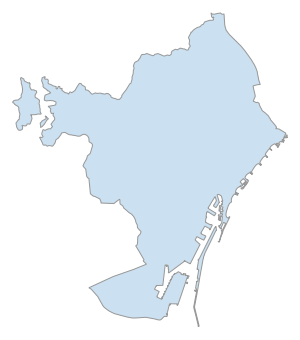

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0bc3804320>)

In [2]:
import osmnx as ox

city= ox.gdf_from_place('Barcelona, Spain')
ox.plot_shape(ox.project_gdf(city))

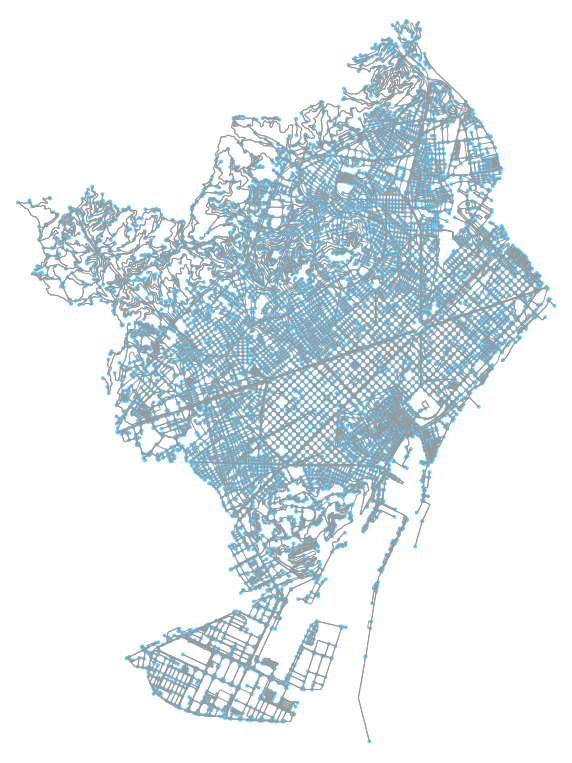

(<Figure size 720x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0bbd562588>)

In [3]:
G=ox.graph_from_place('Barcelona, Spain', network_type='bike')
ox.plot_graph(G,fig_height=15,fig_width=10)

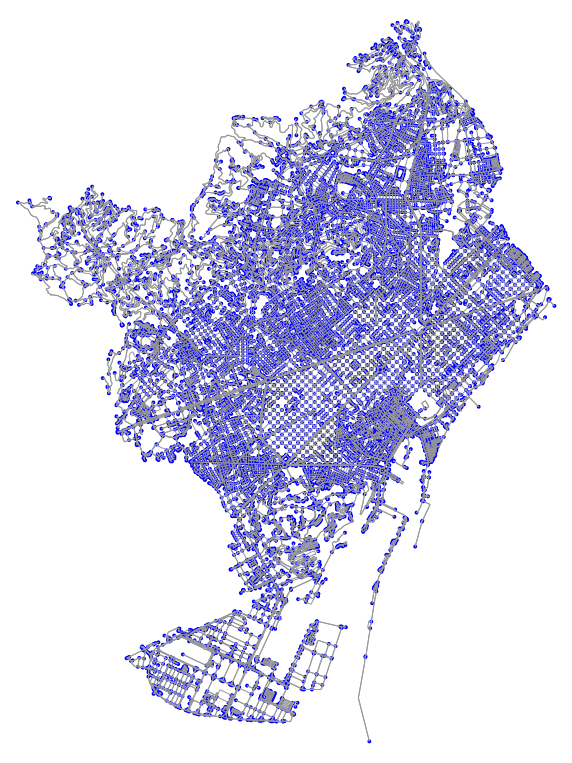

(<Figure size 720x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0baac69b38>)

In [4]:
G=ox.graph_from_place('Barcelona, Spain', network_type='bike',retain_all=False)

ox.plot_graph(G,fig_height=15,fig_width=10,node_color='b')

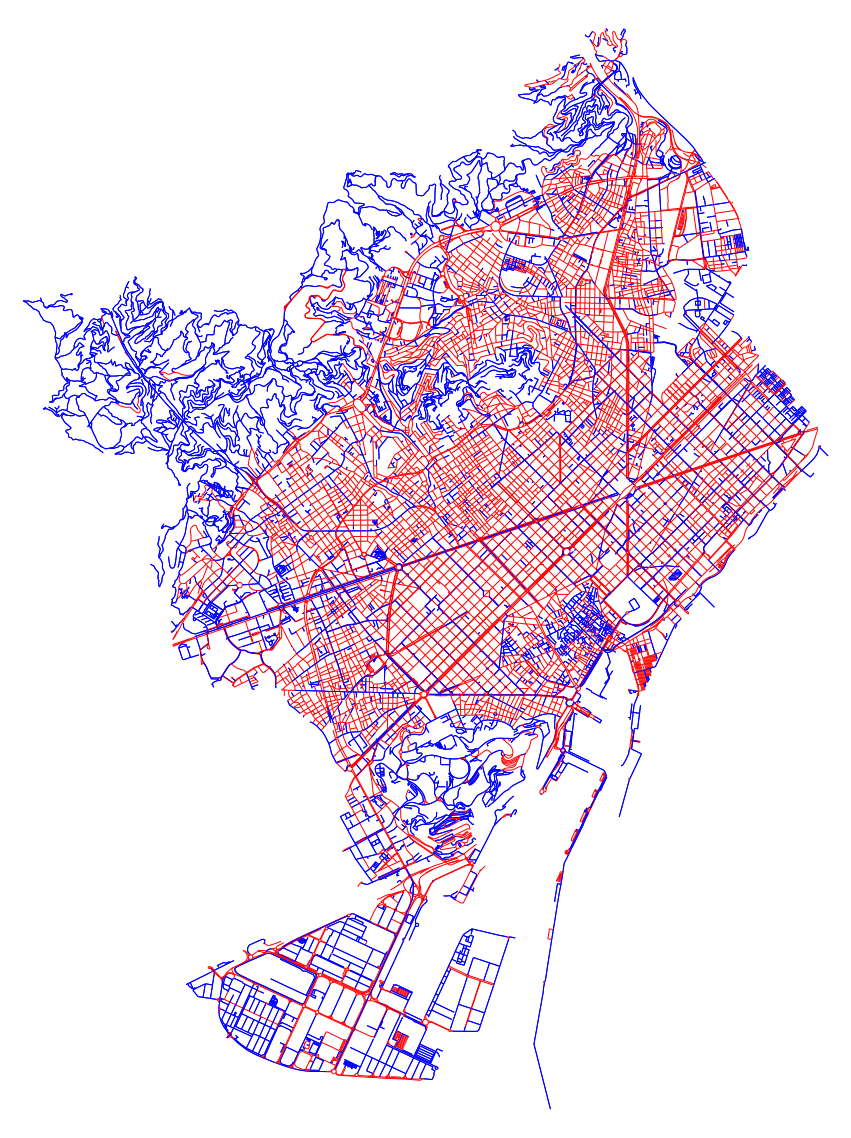

(<Figure size 1080x1800 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0bbce4dcf8>)

In [5]:
ec = ['r' if data['oneway'] else 'b' for u, v, key, data in G.edges(keys=True, data=True)]
ox.plot_graph(G, node_size=0, edge_color=ec,fig_height=25,fig_width=15)

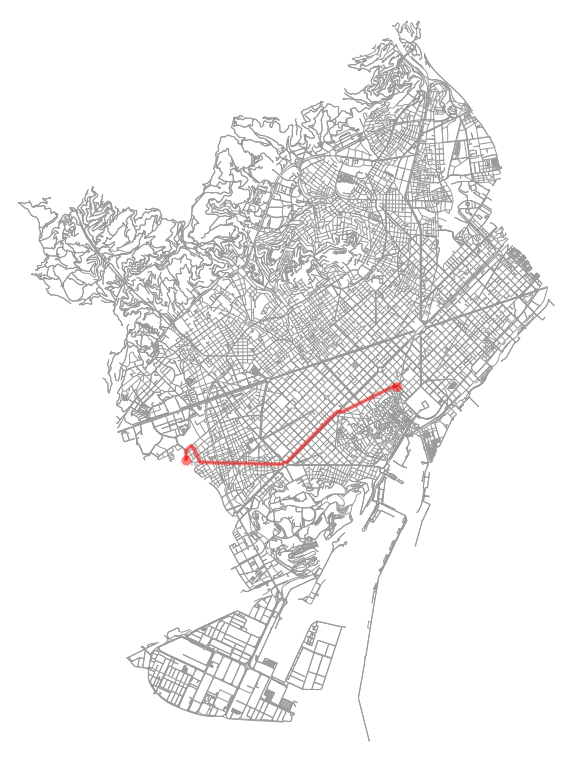

In [8]:
import networkx as nx
#ROUTING:

# get the nearest network node to each point
orig_node = ox.get_nearest_node(G, (41.391052, 2.180645)) #arc d tionf
dest_node = ox.get_nearest_node(G, (41.3751984992, 2.12036451854))#camp nou

# find the route between these nodes then plot it
route = nx.shortest_path(G, orig_node, dest_node, weight='length')
fig, ax = ox.plot_graph_route(G, route, node_size=0,fig_height=15,fig_width=10)


In [9]:
#How long is the route in meters?
nx.shortest_path_length(G, orig_node, dest_node, weight='length')

6146.008000000002

Como bajar los datos para modificar los pesos:

https://stackoverflow.com/questions/59322020/is-there-any-way-to-compute-networkx-dijkstras-algorithm-from-osmnx-graphs-with

Como usar un Graph Algorithm:
    
https://www.geeksforgeeks.org/graph-data-structure-and-algorithms/#shortestPath
    

In [10]:
city_graph= ox.graph_from_place('Barcelona,Catalunya,Spain',retain_all=False , network_type='bike')

city_nodes, city_edges = ox.graph_to_gdfs(city_graph)

In [11]:
city_nodes

,y,x,osmid,highway,ref,geometry
412549129,41.408580,2.147194,412549129,NaN,NaN,POINT (2.14719 41.40858)
412549130,41.407665,2.148066,412549130,NaN,NaN,POINT (2.14807 41.40766)
412549132,41.407868,2.146323,412549132,NaN,NaN,POINT (2.14632 41.40787)
412549133,41.405680,2.143774,412549133,NaN,NaN,POINT (2.14377 41.40568)
412549137,41.405680,2.145332,412549137,NaN,NaN,POINT (2.14533 41.40568)
...,...,...,...,...,...,...
2582773744,41.356966,2.145013,2582773744,NaN,NaN,POINT (2.14501 41.35697)
347340786,41.406186,2.198988,347340786,NaN,NaN,POINT (2.19899 41.40619)
7026769911,41.443216,2.167604,7026769911,NaN,NaN,POINT (2.16760 41.44322)
7026769912,41.443066,2.167219,7026769912,NaN,NaN,POINT (2.16722 41.44307)


In [12]:
city_edges

,u,v,key,osmid,oneway,lanes,name,highway,maxspeed,length,geometry,service,junction,access,width,bridge,ref,est_width,tunnel,area
0,412549129,30960821,0,74621162,True,2,Avinguda de la República Argentina,tertiary,30,43.873,"LINESTRING (2.14719 41.40858, 2.14739 41.40834...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,412549130,7095943437,0,36726124,True,2,Carrer de Velázquez,residential,30,72.002,"LINESTRING (2.14807 41.40766, 2.14817 41.40772...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,412549130,415950289,0,"[486756070, 284386838, 486756071]",True,2,Avinguda de la República Argentina,tertiary,30,168.370,"LINESTRING (2.14807 41.40766, 2.14866 41.40719...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,412549132,30960820,0,34099200,True,NaN,Carrer de Ferran Puig,residential,30,44.225,"LINESTRING (2.14632 41.40787, 2.14668 41.40757)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,412549132,1487379449,0,35172817,True,NaN,Carrer d'Escipió,residential,30,65.618,"LINESTRING (2.14632 41.40787, 2.14684 41.40831)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36130,7026769911,2250836754,0,215609929,False,1,Plaça d'Isabel de Villena,residential,30,8.987,"LINESTRING (2.16760 41.44322, 2.16756 41.44329)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36131,7026769911,2250836713,0,215609929,False,1,Plaça d'Isabel de Villena,residential,30,84.751,"LINESTRING (2.16760 41.44322, 2.16765 41.44315...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36132,7026769912,7026769911,0,751654978,True,NaN,NaN,service,NaN,36.234,"LINESTRING (2.16722 41.44307, 2.16760 41.44322)",parking_aisle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36133,2268659706,347353582,0,217581804,True,NaN,Carrer de la Llacuna,secondary_link,50,106.372,"LINESTRING (2.20518 41.39627, 2.20526 41.39623...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
import pandas as pd
city_edges.to_csv('city_edges.csv')

In [19]:
import numpy as np
#creando una columna random para usar como nuevos pesos.
city_edges['test1']=np.random.randint(1,3000,city_edges.shape[0])


In [20]:
#creo nuevo graph para poder usar los pesos de test1
updated_city_graph=ox.gdfs_to_graph(city_nodes,city_edges)


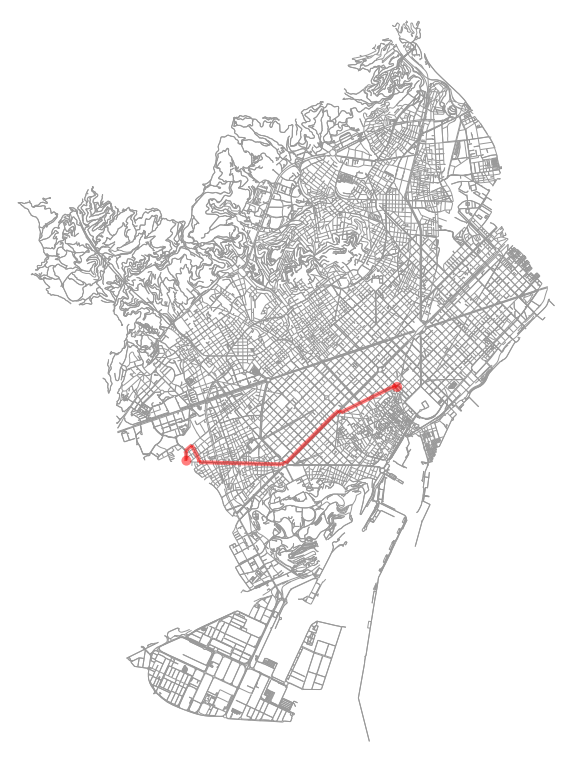

In [21]:
orig_node = ox.get_nearest_node(updated_city_graph, (41.391052, 2.180645)) #arc d tionf
dest_node = ox.get_nearest_node(updated_city_graph, (41.3751984992, 2.12036451854))#camp nou

# find the route between these nodes then plot it
route = nx.shortest_path(updated_city_graph, orig_node, dest_node, weight='length')
fig, ax = ox.plot_graph_route(G, route, node_size=0,fig_height=15,fig_width=10)


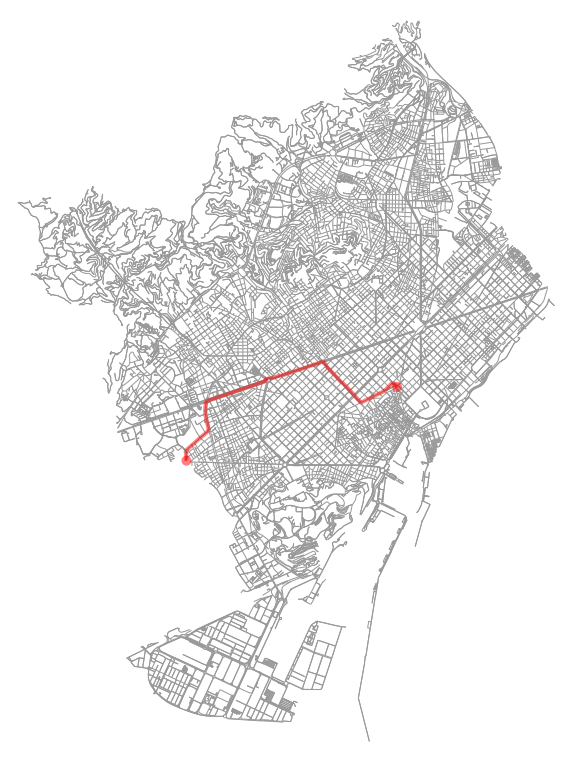

In [25]:
orig_node = ox.get_nearest_node(updated_city_graph, (41.391052, 2.180645)) #arc d tionf
dest_node = ox.get_nearest_node(updated_city_graph, (41.3751984992, 2.12036451854))#camp nou

# find the route between these nodes then plot it
route = nx.shortest_path(updated_city_graph, orig_node, dest_node, weight='test1')
fig, ax = ox.plot_graph_route(updated_city_graph, route, node_size=0,fig_height=15,fig_width=10)


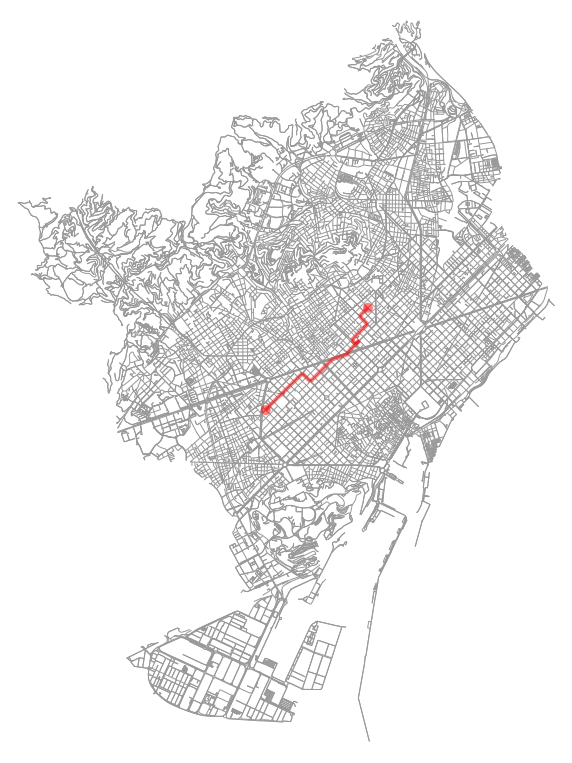

In [26]:
test1_path = nx.dijkstra_path(updated_city_graph, source = 30237607, target = 30254084, weight = 'test1')
fig, ax = ox.plot_graph_route(updated_city_graph, test1_path, node_size=0,fig_height=15,fig_width=10)
